# Projeto 1 - Predição da precificação de casas 
## House Sales in King County, USA - Kaggle

## Introdução

Este é um conjunto de dados armazenado no Kaggle, uma plataforma de estudo e competições de Ciência de Dados. Segue a tradução sobre o conjunto de dados.

**"Este conjunto de dados contém preços de venda de casas para King County, que inclui Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015."**

Segue a descrição das variaveis:

- id - identificação unica para cada venda
- date - data da venda
- price - preço da venda
- bedrooms - número de quartos
- bathrooms - número de banheiros
- sqft_living - tamanho da casa em metros quadrados
- sqft_lot - tamanho do lote em metros quadrados
- floors - número de andares
- waterfront - vista para praia
- view - visitado
- condition - condição da casa
- grade - nota de qualidade (baseado no sistema de classificação do King County)
- sqft_above - tamanho da área abaixo da casa em metros quadrados
- sqft_basement - tamanho do porão em metros quadrados
- yr_built - ano de construção
- yr_renovated - ano da ultima reforma
- zipcode - CEP
- lat - latitude
- long - longitude
- sqft_living15 - área da casa em 2015 (implica a algumas reformas). Isso pode ou não ter afetado a área do lote
- sqft_lot15 - área do lote em 2015 (implica a algumas reformas)

# Sobre este projeto

Este é o seu primeiro projeto usando Ciência de Dados. Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão linear e justificar

# Preparação do ambiente

- Acessem o link - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction e logo abaixo cliquem em "Download". Caso voce não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()



Mounted at /content/drive


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Convertendo variaveis de Pés ao quadrado para Metros ao quadrado
df[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']] *= 0.092903

# Exercicio 1. (0.5 pontos)

Formule ao menos duas perguntas que você acha que poderiam ser respondidas usando os dados

**RESPOSTA** (VALE 0.5 pontos): 
1 - Quantos imoveis são com vista para o mar?
2 - Qual a média de preço dos imoveis com e sem vista para o mar?

# Exercicio 2. (2.5 pontos)

A capacidade de comunicação é um dos principais pontos na análise de dados, pois sua análise deve ser tão boa quanto a sua capacidade de comunicá-la. Para isso usamos tabelas resumo e gráficos para apresentar os principais achados do trabalho realizado. Podemos adicionar outros materias que possam aprofundar essa apresentação como artigos e outros estudos realizados.

Assim, qual visualização você acha interessante destacar?

**RESPOSTA** (VALE 0.75 pontos): A principio gostaria de destacar a quantidade de casas com ou sem vista para mar e qual desses grupos tem o maior indice de visitas. 

In [4]:
#### (VALE 1.5 pontos)
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO
import matplotlib.pyplot as plt

vista_mar = df['waterfront'] == 1
vista_mar = df[vista_mar]
vista_mar.sort_values('price')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18275,2781600195,2014-11-17,285000.0,1,1.00,98.47718,5095.357938,1.0,1,4,...,5,98.47718,0.00000,1935,0,98070,47.4716,-122.445,209.774974,2950.785086
1168,3523029041,2014-10-09,290000.0,2,0.75,40.87732,772.302639,1.0,1,3,...,5,40.87732,0.00000,1943,0,98070,47.4339,-122.512,81.754640,2442.326967
6102,222029026,2014-09-17,340000.0,2,0.75,98.47718,4486.471676,1.0,1,2,...,6,52.02568,46.45150,1947,0,98070,47.4285,-122.511,69.677250,7450.913503
16570,2923039243,2014-11-13,340000.0,4,1.00,111.48360,1099.414102,1.0,1,3,...,6,111.48360,0.00000,1972,0,98070,47.4557,-122.443,155.148010,4409.362186
11556,2013802030,2014-09-11,357000.0,3,2.00,228.54138,5005.799446,1.0,1,4,...,7,228.54138,0.00000,1955,0,98198,47.3811,-122.325,247.121980,3030.960375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,7738500731,2014-08-15,4500000.0,5,5.50,616.87592,3717.420642,2.0,1,4,...,12,589.93405,26.94187,2004,0,98155,47.7493,-122.280,281.496090,2174.673424
8092,1924059029,2014-06-17,4668000.0,5,6.75,895.58492,1214.056404,1.0,1,4,...,12,447.79246,447.79246,1983,2009,98040,47.5570,-122.210,303.792810,971.207962
1164,1247600105,2014-10-20,5110800.0,5,5.25,744.15303,4228.665851,2.0,1,4,...,12,556.48897,187.66406,1999,0,98033,47.6767,-122.211,318.657290,2488.685564
1315,7558700030,2015-04-13,5300000.0,6,6.00,686.55317,2306.688587,2.0,1,4,...,12,464.51500,222.03817,1991,0,98040,47.5631,-122.210,401.340960,2287.178957


## ANALISANDO IMÓVEIS COM VISTA PARA O MAR


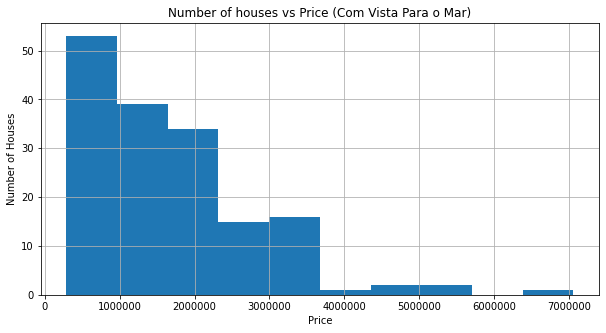

In [5]:
#from IPython.core.pylabtools import figsize
vista_mar.hist('price', figsize=[10,5])
plt.title('Number of houses vs Price (Com Vista Para o Mar)')
plt.ylabel('Number of Houses')
plt.xlabel("Price")
plt.ticklabel_format(style='plain')


In [6]:
print(vista_mar.price.min())
print(vista_mar.price.max())


285000.0
7062500.0


O grupo de casas com vista para o mar compreende-se em 163 imóveis com preços que variam entre 285000 à 7062500 

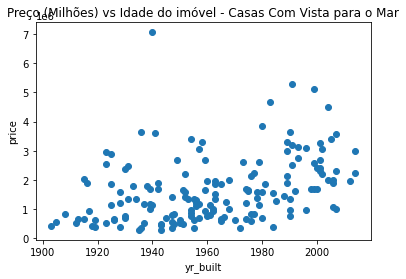

In [7]:
plt.scatter(vista_mar['yr_built'], vista_mar['price'], label='dados')
plt.xlabel('yr_built')
plt.ylabel('price')
plt.title('Preço (Milhões) vs Idade do imóvel - Casas Com Vista para o Mar')
plt.show()


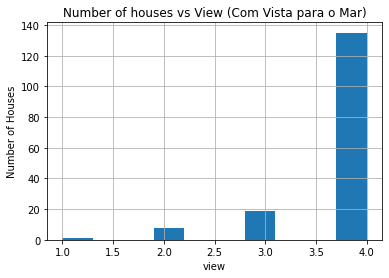

In [8]:
vista_mar.hist('view')
plt.title('Number of houses vs View (Com Vista para o Mar)')
plt.ylabel('Number of Houses')
plt.xlabel("view")
plt.ticklabel_format(style='plain')

In [9]:
df1 = vista_mar.value_counts('view')
df1

view
4    135
3     19
2      8
1      1
dtype: int64

Os dois primeiros graficos representam o número de casas vendidas assim como seus respectivos valores e ano de construção do imóvel, cruzando os dados dos dois gráficos podemos inferir que quanto mais nova a casa maior o seu valor. O terceiro gráfico faz a relação de visitação (interesse e procura) por casas litoranias, abaixo do grafico tem o número de casas pela quantidade de visitas (ex: 135 imóveis tiveram 4 visitações).

## ANALISANDO IMÓVEIS SEM VISTA PARA O MAR

In [10]:
sem_vista_mar = df['waterfront'] == 0
sem_vista_mar = df[sem_vista_mar]
sem_vista_mar.sort_values('price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,2015-02-17,75000.0,1,0.00,62.24501,4029.853431,1.0,0,0,...,3,62.24501,0.00000,1966,0,98022,47.2638,-121.906,107.76748,3983.866446
15293,40000362,2014-05-06,78000.0,2,1.00,72.46434,1518.406632,1.0,0,0,...,5,72.46434,0.00000,1942,0,98168,47.4739,-122.280,157.93510,964.983461
465,8658300340,2014-05-23,80000.0,1,0.75,39.94829,469.160150,1.0,0,0,...,4,39.94829,0.00000,1912,0,98014,47.6499,-121.909,111.48360,696.772500
16198,3028200080,2015-03-24,81000.0,2,1.00,67.81919,926.707425,1.0,0,0,...,5,67.81919,0.00000,1943,0,98168,47.4808,-122.315,79.89658,836.127000
8274,3883800011,2014-11-05,82000.0,3,1.00,79.89658,968.606678,1.0,0,0,...,6,79.89658,0.00000,1954,0,98146,47.4987,-122.341,105.90942,1045.158750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8638,3835500195,2014-06-18,4489000.0,4,3.00,597.36629,2556.411851,2.0,0,0,...,12,597.36629,0.00000,2001,0,98004,47.6208,-122.219,345.59916,1355.640576
1448,8907500070,2015-04-13,5350000.0,5,5.00,743.22400,2228.278455,2.0,0,4,...,12,624.30816,118.91584,2009,0,98004,47.6232,-122.220,427.35380,2020.640250
4411,2470100110,2014-08-04,5570000.0,5,5.75,854.70760,3258.015307,2.0,0,0,...,13,575.99860,278.70900,2001,0,98039,47.6289,-122.233,330.73468,2261.723535
9254,9208900037,2014-09-19,6885000.0,6,7.75,918.81067,2914.738722,2.0,0,4,...,13,823.12058,95.69009,2001,0,98039,47.6305,-122.240,421.77962,3969.745190


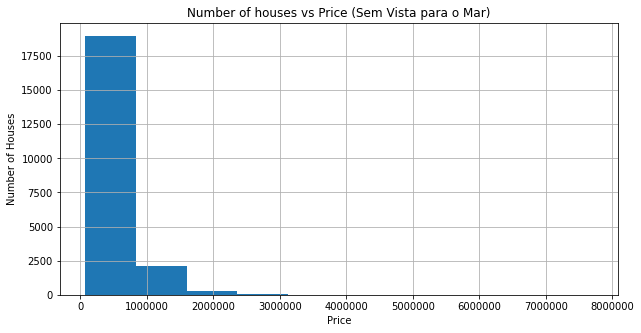

In [11]:

sem_vista_mar.hist('price',figsize=[10,5])
plt.title('Number of houses vs Price (Sem Vista para o Mar)')
plt.ylabel('Number of Houses')
plt.xlabel("Price")
plt.ticklabel_format(style='plain')

In [12]:
print(sem_vista_mar.price.min())
print(sem_vista_mar.price.max())

75000.0
7700000.0


O grupo de casas sem vista para o mar compreende-se em 21450 imóveis com preços que variam entre 75000 à 7700000.

Text(0.5, 1.0, 'Preço (Milhões) vs Idade do imóvel - Casas Sem Vista para o Mar')

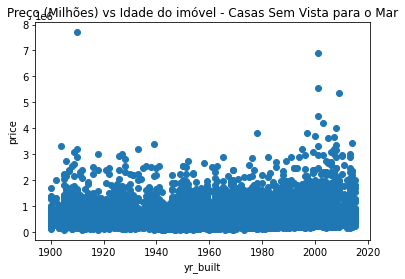

In [13]:
plt.scatter(sem_vista_mar['yr_built'], sem_vista_mar['price'], label='dados')
plt.xlabel('yr_built')
plt.ylabel('price')
plt.title('Preço (Milhões) vs Idade do imóvel - Casas Sem Vista para o Mar')

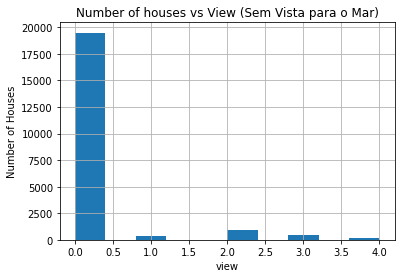

In [14]:
sem_vista_mar.hist('view')
plt.title('Number of houses vs View (Sem Vista para o Mar)')
plt.ylabel('Number of Houses')
plt.xlabel("view")
plt.ticklabel_format(style='plain')

In [15]:
df2 = sem_vista_mar.value_counts('view')
df2


view
0    19489
2      955
3      491
1      331
4      184
dtype: int64

Os dois primeiros graficos representam o número de casas vendidas assim como seus respectivos valores e ano de construção do imóvel, cruzando os dados dos dois gráficos podemos inferir que a idade do imóvel não interfere grandemente com o valor ao contrario do que acontece com imóveis com vista para o mar. O terceiro gráfico faz a relação de visitação (interesse e procura) por imóveis nas areas mais distante do mar, abaixo do grafico a relação de imóveis pela suas visitações (ex: 184 imóveis tiveram 4 visitações).

A sua visualização responde uma das suas perguntas? Se não, o que ela responde?

**RESPOSTA** (VALE 0.75 pontos): Não, os graficos mostram que apesar e haver uma maior quantidade de casas sem vista para o mar e com preços mais acessiveis, a procura é bem maior por visitações nas casas com vista para o litoral, alem disso o scatter mostra que a idade da construção dos imoveis litoranios tem influência no seu valor enquanto os imoveis mais afastados do litoral a idade do imovel não tem tanta influência. Porem com as analises dos dados por grupo consegui responder as perguntas iniciais.

# Exercicio 3. (3 pontos)

Faremos uma analise exploratoria sobre estes dados, preencha abaixo analises sobre o conjunto de dados. Para isso a biblioteca numpy para obter a contagem, média, mediana e os quartis.

In [16]:
#### (VALE 0.75 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
print('='*50)
print(f"{'MÉDIAS':^50}")
print('='*50)
np.mean(df)

                      MÉDIAS                      


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


id               4.580302e+09
price            5.400881e+05
bedrooms         3.370842e+00
bathrooms        2.114757e+00
sqft_living      1.932289e+02
sqft_lot         1.403483e+03
floors           1.494309e+00
waterfront       7.541757e-03
view             2.343034e-01
condition        3.409430e+00
grade            7.656873e+00
sqft_above       1.661469e+02
sqft_basement    2.708206e+01
yr_built         1.971005e+03
yr_renovated     8.440226e+01
zipcode          9.807794e+04
lat              4.756005e+01
long            -1.222139e+02
sqft_living15    1.845567e+02
sqft_lot15       1.186228e+03
dtype: float64

In [17]:
print('='*50)
print(f"{'MEDIANAS':^50}")
print('='*50)
print(f"Price: {np.median(df['price'])}")
print(f"Bedrooms: {np.median(df['bedrooms'])}")
print(f"Bathrooms: {np.median(df['bathrooms'])}")
print(f"Sqft_living: {np.median(df['sqft_living'])}")
print(f"Sqft_lot: {np.median(df['sqft_lot'])}")
print(f"Floors: {np.median(df['floors'])}")
print(f"Waterfront: {np.median(df['waterfront'])}")
print(f"View: {np.median(df['view'])}")
print(f"Condition: {np.median(df['condition'])}")
print(f"Grade: {np.median(df['grade'])}")
print(f"Sqft_above: {np.median(df['sqft_above'])}")
print(f"Sqft_basement: {np.median(df['sqft_basement'])}")
print(f"yr_built: {np.median(df['yr_built'])}")
print(f"yr_renovated: {np.median(df['yr_renovated'])}")
print(f"zipcode: {np.median(df['zipcode'])}")
print(f"lat: {np.median(df['lat'])}")
print(f"long: {np.median(df['long'])}")
print(f"Sqft_living15: {np.median(df['sqft_living15'])}")
print(f"Sqft_lot15: {np.median(df['sqft_lot15'])}")

                     MEDIANAS                     
Price: 450000.0
Bedrooms: 3.0
Bathrooms: 2.25
Sqft_living: 177.44473
Sqft_lot: 707.735054
Floors: 1.5
Waterfront: 0.0
View: 0.0
Condition: 3.0
Grade: 7.0
Sqft_above: 144.92867999999999
Sqft_basement: 0.0
yr_built: 1975.0
yr_renovated: 0.0
zipcode: 98065.0
lat: 47.5718
long: -122.23
Sqft_living15: 170.94152
Sqft_lot15: 707.92086


In [18]:
print('='*50)
print(f"{'1º QUARTIL':^50}")
print('='*50)
print(f"Price: {np.percentile(df['price'],25)}")
print(f"Bedrooms: {np.percentile(df['bedrooms'],25)}")
print(f"Bathrooms: {np.percentile(df['bathrooms'],25)}")
print(f"Sqft_living: {np.percentile(df['sqft_living'],25)}")
print(f"Sqft_lot: {np.percentile(df['sqft_lot'],25)}")
print(f"Floors: {np.percentile(df['floors'],25)}")
print(f"Waterfront: {np.percentile(df['waterfront'],25)}")
print(f"View: {np.percentile(df['view'],25)}")
print(f"Condition: {np.percentile(df['condition'],25)}")
print(f"Grade: {np.percentile(df['grade'],25)}")
print(f"Sqft_above: {np.percentile(df['sqft_above'],25)}")
print(f"Sqft_basement: {np.percentile(df['sqft_basement'],25)}")
print(f"yr_built: {np.percentile(df['yr_built'],25)}")
print(f"yr_renovated: {np.percentile(df['yr_renovated'],25)}")
print(f"zipcode: {np.percentile(df['zipcode'],25)}")
print(f"lat: {np.percentile(df['lat'],25)}")
print(f"long: {np.percentile(df['long'],25)}")
print(f"Sqft_living15: {np.percentile(df['sqft_living15'],25)}")
print(f"Sqft_lot15: {np.percentile(df['sqft_lot15'],25)}")

                    1º QUARTIL                    
Price: 321950.0
Bedrooms: 3.0
Bathrooms: 1.75
Sqft_living: 132.57258099999999
Sqft_lot: 468.23112
Floors: 1.0
Waterfront: 0.0
View: 0.0
Condition: 3.0
Grade: 7.0
Sqft_above: 110.55457
Sqft_basement: 0.0
yr_built: 1951.0
yr_renovated: 0.0
zipcode: 98033.0
lat: 47.471
long: -122.328
Sqft_living15: 138.42547
Sqft_lot15: 473.8053


In [19]:
print('='*50)
print(f"{'3º QUARTIL':^50}")
print('='*50)
print(f"Price: {np.percentile(df['price'],75)}")
print(f"Bedrooms: {np.percentile(df['bedrooms'],75)}")
print(f"Bathrooms: {np.percentile(df['bathrooms'],75)}")
print(f"Sqft_living: {np.percentile(df['sqft_living'],75)}")
print(f"Sqft_lot: {np.percentile(df['sqft_lot'],75)}")
print(f"Floors: {np.percentile(df['floors'],75)}")
print(f"Waterfront: {np.percentile(df['waterfront'],75)}")
print(f"View: {np.percentile(df['view'],75)}")
print(f"Condition: {np.percentile(df['condition'],75)}")
print(f"Grade: {np.percentile(df['grade'],75)}")
print(f"Sqft_above: {np.percentile(df['sqft_above'],75)}")
print(f"Sqft_basement: {np.percentile(df['sqft_basement'],75)}")
print(f"yr_built: {np.percentile(df['yr_built'],75)}")
print(f"yr_renovated: {np.percentile(df['yr_renovated'],75)}")
print(f"zipcode: {np.percentile(df['zipcode'],75)}")
print(f"lat: {np.percentile(df['lat'],75)}")
print(f"long: {np.percentile(df['long'],75)}")
print(f"Sqft_living15: {np.percentile(df['sqft_living15'],75)}")
print(f"Sqft_lot15: {np.percentile(df['sqft_lot15'],75)}")

                    3º QUARTIL                    
Price: 645000.0
Bedrooms: 4.0
Bathrooms: 2.5
Sqft_living: 236.90265
Sqft_lot: 992.947264
Floors: 2.0
Waterfront: 0.0
View: 0.0
Condition: 4.0
Grade: 8.0
Sqft_above: 205.31563
Sqft_basement: 52.02568
yr_built: 1997.0
yr_renovated: 0.0
zipcode: 98118.0
lat: 47.678
long: -122.125
Sqft_living15: 219.25108
Sqft_lot15: 936.740949


In [20]:
# VALE 0.75 pontos
# Substitua __ pelos valores solicitados
print('Existem {} observações no conjunto de dados'.format(df.shape[0]))
print('Existem {} variaveis no conjunto de dados'.format(df.shape[1]))
print('O tamanho médio das casa é de {:.2f} metros quadrados'.format(df['sqft_living'].mean()))
print('A mediana do tamanho das casas é de {:.2f} metros quadrados'.format(df['sqft_living'].median()))

# Quartis
print('primeiro quartil {:.2f} do tamanho das casas'.format(df['sqft_living'].quantile(0.25)))
print('terceiro quartil {:.2f} do tamanho das casas'.format(df['sqft_living'].quantile(0.75)))

Existem 21613 observações no conjunto de dados
Existem 21 variaveis no conjunto de dados
O tamanho médio das casa é de 193.23 metros quadrados
A mediana do tamanho das casas é de 177.44 metros quadrados
primeiro quartil 132.57 do tamanho das casas
terceiro quartil 236.90 do tamanho das casas


Neste conjunto de dados há casas com tamanho muito acima ou abaixo do esperado (outliers)? Faça um gráfico de caixa (boxplot) do tamanho das casas.

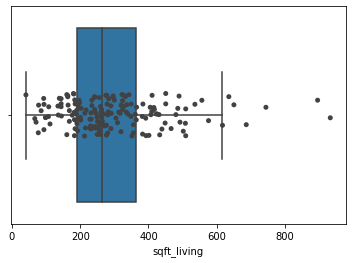

In [21]:
#### (VALE 0.75 pontos)
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO
import seaborn as sns

sns.boxplot(x='sqft_living', data=vista_mar, showfliers=False)
sns.stripplot(x='sqft_living',data=vista_mar, color='.26')


In [22]:
# Calculando Maximo e Minimo Típico
def box_plot(x):
  q1 = x.sqft_living.quantile(0.25)
  q3 = x.sqft_living.quantile(0.75)
  DQ = q3 - q1
  minimo = q1 - (1.5 * DQ)
  maximo = q3 + (1.5 * DQ)

  if minimo < x.sqft_living.min():
    minimo = x.sqft_living.min()
  if maximo > x.sqft_living.max():
    maximo = x.sqft_living.max()

  print(f"Mínimo: {minimo}")
  print(f"1º Quartil: {q1}")
  print(f"Mediana: {vista_mar.sqft_living.median()}")
  print(f"3º Quartil: {q3}")
  print(f"Máximo: {maximo}")
  return maximo,minimo


m,n = box_plot(vista_mar)


Mínimo: 40.87732
1º Quartil: 191.38018
Mediana: 264.77355
3º Quartil: 362.78621499999997
Máximo: 619.8952674999999


In [23]:
# Filtro dos outliers

outlier_vista_mar = vista_mar['sqft_living'] > m
outlier_vista_mar = vista_mar[outlier_vista_mar]
outlier_vista_mar

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,2014-10-20,5110800.0,5,5.25,744.15303,4228.665851,2.0,1,4,...,12,556.48897,187.66406,1999,0,98033,47.6767,-122.211,318.657290,2488.685564
1315,7558700030,2015-04-13,5300000.0,6,6.00,686.55317,2306.688587,2.0,1,4,...,12,464.51500,222.03817,1991,0,98040,47.5631,-122.210,401.340960,2287.178957
2444,7524900003,2014-12-10,3278000.0,2,1.75,635.45652,929.030000,2.5,1,4,...,11,404.12805,231.32847,2001,0,98008,47.6042,-122.112,289.857360,1142.706900
3914,9808700762,2014-06-11,7062500.0,5,4.50,932.74612,3467.604475,2.0,1,2,...,11,713.49504,219.25108,1940,2001,98004,47.6500,-122.214,365.108790,2364.288447
8092,1924059029,2014-06-17,4668000.0,5,6.75,895.58492,1214.056404,1.0,1,4,...,12,447.79246,447.79246,1983,2009,98040,47.5570,-122.210,303.792810,971.207962
15482,624069108,2014-08-12,3200000.0,4,3.25,650.32100,2620.422018,1.0,1,4,...,12,325.16050,325.16050,1991,0,98075,47.5928,-122.086,456.432439,1362.236689


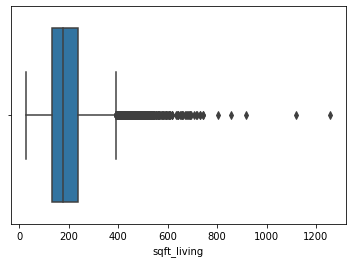

In [24]:
sns.boxplot(x='sqft_living', data=sem_vista_mar, showfliers=True)


In [25]:
m1,n1 = box_plot(sem_vista_mar)

Mínimo: 26.94187
1º Quartil: 131.92226
Mediana: 264.77355
3º Quartil: 235.97362
Máximo: 392.05066


In [26]:
# Filtro dos outliers
outlier_sem_vista_mar = sem_vista_mar['sqft_living'] > m1
outlier_sem_vista_mar = sem_vista_mar[outlier_sem_vista_mar]
outlier_sem_vista_mar

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,2014-05-12,1225000.0,4,4.50,503.53426,9469.602790,1.0,0,0,...,11,361.39267,142.14159,2001,0,98053,47.6561,-122.005,442.21828,9469.602790
70,1525059190,2014-09-12,1040000.0,5,3.25,443.14731,4653.882882,1.0,0,0,...,11,285.21221,157.93510,1973,0,98005,47.6525,-122.160,327.94759,3615.506051
115,3626039325,2014-11-21,740500.0,3,3.50,406.91514,589.934050,2.0,0,0,...,8,258.27034,148.64480,1900,1999,98117,47.6981,-122.368,170.01249,589.934050
153,7855801670,2015-04-01,2250000.0,4,3.25,481.23754,1844.124550,2.0,0,3,...,12,328.87662,152.36092,2006,0,98006,47.5620,-122.162,293.57348,905.804250
239,5152100060,2014-05-29,472000.0,6,2.50,409.70223,1303.800702,1.0,0,2,...,9,218.32205,191.38018,1965,0,98003,47.3376,-122.324,241.54780,1299.527164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,715010530,2015-01-13,1881580.0,5,3.50,409.70223,1207.739000,2.0,0,3,...,10,271.27676,138.42547,2014,0,98006,47.5382,-122.111,537.90837,1204.859007
21551,1561750040,2014-12-24,1375000.0,5,4.50,404.12805,1245.364715,2.0,0,0,...,11,404.12805,0.00000,2014,0,98074,47.6018,-122.060,370.68297,669.644824
21561,6664500090,2015-01-15,750000.0,5,4.00,418.06350,755.301390,2.0,0,0,...,10,418.06350,0.00000,2007,0,98059,47.4832,-122.145,263.84452,780.571006
21590,7430200100,2014-05-14,1222500.0,4,3.50,456.15373,877.375932,1.5,0,0,...,11,288.92833,167.22540,2007,0,98074,47.6502,-122.066,423.63768,1027.785889


Observando a sua visualização, há casas com tamanhos muito abaixo ou acima do esperado (outliers)? 

**RESPOSTA** (VALE 0.75 pontos): Sim, tanto as casas com vista para o mar quanto as sem vista para o mar apresentarão valores muito acima porem em ambos os casos não tiveram valores muito abaixo. Conforme Tabela Abaixo: 
<table>
  <tr>
    <th>casas/outlier</th>
    <th>Abaixo</th>
    <th>Acima</th>
  </tr>
  <tr>
    <td>Com vista para o mar</td>
    <td>0</td>
    <td>6</td>
  </tr>
  <tr>
    <td>Sem vista para o mar</td>
    <td>0</td>
    <td>549</td>
  </tr>
</table>

# Exercicio 4. (4 pontos)

Construa um modelo de regressão linear para predizer a variável **price** (preço) com **statsmodels.api**.

In [27]:

#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

X = df.drop(columns=['id','date','price','zipcode'])
X = sm.add_constant(X)
y = df['price']

modelo = OLS(endog=y,exog=X)
resultado = modelo.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [28]:
#### (VALE 0.625 pontos)
#### EXECUTE O COMANDO ABAIXO
print(resultado.summary())
#.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     3082.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:38:14   Log-Likelihood:            -2.9476e+05
No. Observations:               21613   AIC:                         5.895e+05
Df Residuals:                   21596   BIC:                         5.897e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.686e+07    1.6e+06    -23.105

Faça outro modelo usando a biblioteca **sklearn**.

In [29]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error


X_padronizado = StandardScaler().fit_transform(X)
y1 = y
X_train, X_test, y_train, y_test = train_test_split(X_padronizado, y1, test_size = 0.2, random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)



In [30]:
r2_score(y_test,y_pred)

0.697382208262352

In [31]:
mean_absolute_error(y_test, y_pred)

124400.18556846587

Qual o valor de ${R}^{2}$ e $MAE$ obtido?

**RESPOSTA** (VALE 0.5 pontos):<br> 
R² = 0.697382208262352<br>
MAE = 124400.18556846587

Faça novamente um novo modelo utilizando a seleção de caracteristicas, selecionando as 5 variaveis mais importantes.

In [32]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
from sklearn.feature_selection import RFE

lr1 = LinearRegression()
selector = RFE(lr1, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.get_feature_names_out()


array(['waterfront', 'view', 'grade', 'lat', 'long'], dtype=object)

In [33]:
X1 = df[['waterfront','view','grade','lat','long']]
X1_padronizado = StandardScaler().fit_transform(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_padronizado, y1, test_size = 0.2, random_state=10)
lr1.fit(X1_train,y1_train)
y1_pred = lr1.predict(X1_test)

In [34]:
r2_score(y1_test,y1_pred)

0.5496128871163206

In [35]:
mean_absolute_error(y1_test,y1_pred)

149639.7468423416

Quais são as 5 variaveis mais importantes deste conjunto de dados?

**RESPOSTA** (VALE 0.5 pontos): 
> As 5 mais importantes são [waterfront,
 view,
 grade,
 lat,
 long]



Qual o valor de ${R}^{2}$ e $MAE$ deste novo modelo? Este modelo é melhor do que o anterior?

**RESPOSTA** (VALE 0.5 pontos): Para o novo modelo o R² = 0.5496128871163206 e o MAE = 149639.7468423416. O resultado desse modelo foi pior que o modelo anterior conforme mostra as metricas de coeficiente de determinação e erro medio absoluto. Conforme Tabela abaixo:
<table>
  <tr>
    <th>Modelo/Métrica</th>
    <th>R²</th>
    <th>MAE</th>
  </tr>
  <tr>
    <td>Modelo 01</td>
    <td>0.697382208262352</td>
    <td>124400.18556846587</td>
  </tr>
  <tr>
    <td>Modelo 02</td>
    <td>0.5496128871163206</td>
    <td>149639.7468423416</td>
  </tr>
</table>